# First steps with OMEGA - Fitting a galaxy

Prepared by Benoit Côté.  If you have any question, please contact Benoit Côté at <bcote@uvic.ca> or Christian Ritter at <critter@uvic.ca>.

This notebook shows how the general concepts of chemical evolution models, seen in the First_steps_OMEGA_1_closed_box and First_steps_OMEGA_2_open_box notebooks (in the Teaching section), can be used to reproduce the chemical evolution of nearby galaxies.  It also introduce STELLAB, our stellar abundances data management tool (see also the STELLAB_userguide notebook in the Getting Started section).

In [1]:
# Python packages
%matplotlib nbagg
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Shared class between SYGMA and OMEGA
import chem_evol
reload(chem_evol)

# One-zone galactic chemical evolution code
import omega
reload(omega)

# Stellar abundances plotting code
import stellab
reload(stellab)

<module 'stellab' from '/Users/christian/Research/NuGRid/NuPyCEE/stellab.pyc'>

## 1. STELLAB (Stellar Abundances)

To plot the observed stellar abundances of a galaxy, STELLAB first needs to be launched without input parameter.

In [2]:
s = stellab.stellab()

The next step is to select a galaxy.  So far, STELLAB includes the Milky Way, Sculptor, Carina, Fornax, and the LMC.  Simply use the *galaxy* parameter and enter the name of the galaxy with lower cases (spaces need to be replaced by underscores).  Then, use the *plot_spectro* function to visualize the wanted abundance ratios.

<IPython.core.display.Javascript object>


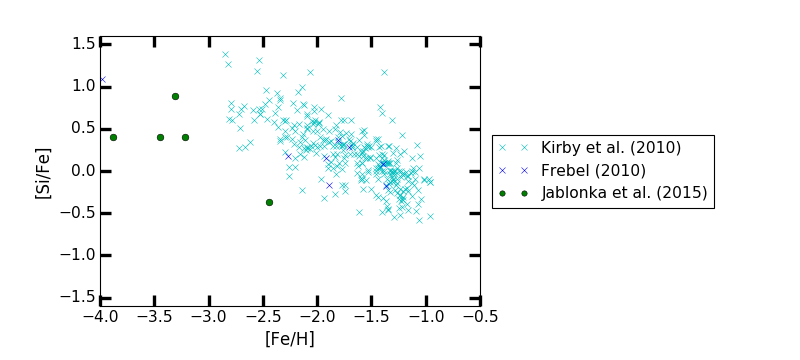

(-1.6, 1.6)

In [3]:
%matplotlib nbagg
galaxy = 'sculptor'
s.plot_spectro(galaxy=galaxy, xaxis='[Fe/H]', yaxis='[Si/Fe]')
plt.ylim(-1.6, 1.6)

## 2.  Fornax and OMEGA - Fitting Mg abundances

To mimic the evolution of a known galaxy, here Fornax, use the *galaxy* parameter when creating an instance of OMEGA.  This will automatically select the appropriate star formation history (SFH) extracted from observations, here de [Boer et al. (2012)](http://adsabs.harvard.edu/abs/2012A%26A...544A..73D).

In [4]:
# Run an OMEGA closed-box simulation of Fornax
galaxy = 'fornax'
o_scl = omega.omega(galaxy=galaxy, mgal=1e9)

OMEGA run in progress..
   OMEGA run completed - Run time: 2.98s


In the plot below, numerical predictions are compared with observations.  **One thing to keep in mind is that the first try is never the good one**.  The input parameters always need to be tuned to better reproduce observations.

<IPython.core.display.Javascript object>


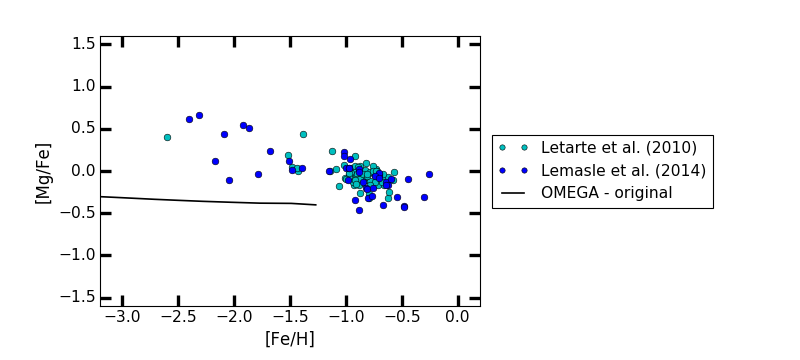

(-3.2, 0.2)

In [5]:
# Select the abundance ratios.
%matplotlib nbagg
yaxis = '[Mg/Fe]'
xaxis = '[Fe/H]'

# Plot observations
s.plot_spectro(galaxy=galaxy, xaxis=xaxis, yaxis=yaxis)

# Extract the numerical prediction using the return_x_y parameter.
xy_omega = o_scl.plot_spectro(xaxis=xaxis, yaxis=yaxis, return_x_y=True)

# Overplot the predictions on top of observations.
# Here I plot a thicker white line behind the black line
# to improve its visibility when the line goes through 
# many data points (which is not the case here..).
plt.plot(xy_omega[0], xy_omega[1], color='w', linewidth=3.0)
plt.plot(xy_omega[0], xy_omega[1], color='k', linewidth=1.5, label='OMEGA - original')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), markerscale=0.8, fontsize=14)
plt.ylim(-1.6, 1.6)
plt.xlim(-3.2, 0.2)

As seen above, the agreement is currently not so good. At high metallicity ([Fe/H] > -1.5), there is no prediction, and at low metallicity ([Fe/H] < -1.5), the predicted [Mg/Fe] ratios are too low compared to observations.  This can be fixed by tuning the input parameters, and the goal of this notebook is to show how it can be done step by step. Let's focus on the low metallicity region first.

### 2.1. Initial mass of gas

Because of our choice of stellar yields, our numerical predictions initially have large [Mg/Fe] values at [Fe/H] < -4 (see the plot below).  We will therefore be able to reproduce the data at low metallicity.

<IPython.core.display.Javascript object>


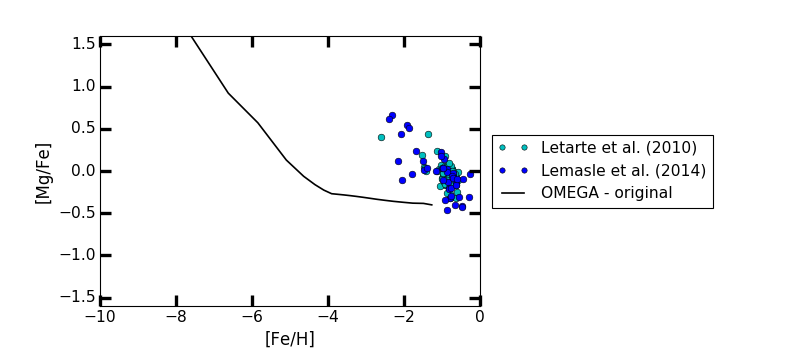

(-1.6, 1.6)

In [6]:
# Select the abundance ratios.
%matplotlib nbagg
yaxis = '[Mg/Fe]'
xaxis = '[Fe/H]'

# Plot observations.
s.plot_spectro(galaxy=galaxy, xaxis=xaxis, yaxis=yaxis)

# Extract the numerical prediction using the return_x_y parameter.
xy_omega = o_scl.plot_spectro(xaxis=xaxis, yaxis=yaxis, return_x_y=True)

# Overplot the predictions on top of observations.
plt.plot(xy_omega[0], xy_omega[1], color='w', linewidth=3.0)
plt.plot(xy_omega[0], xy_omega[1], color='k', linewidth=1.5, label='OMEGA - original')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), markerscale=0.8, fontsize=14)
plt.ylim(-1.6, 1.6)

As seen in First_steps_OMEGA_closed_box.ipynb, numerical predictions can be shifted on the [Fe/H] axis by modifying the initial mass of the gas reservoir. Here we want a shift toward higher [Fe/H]. Therefore, the mass of gas (H) must be reduced to generate a larger Fe contentration. Let's run a simulation with a reduced gas reservoir.

In [7]:
# Run an OMEGA closed-box simulation with less gas.
# .. There will be a warning message saying that the mass of gas is not sufficient .. 
o_scl_1e7 = omega.omega(galaxy=galaxy, mgal=1e7)

OMEGA run in progress..


/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


Warning -- Not enough gas to sustain the SFH. 27
Warning -- Not enough gas to sustain the SFH. 28
Warning -- Not enough gas to sustain the SFH. 29
Warning -- Not enough gas to sustain the SFH. 30
   OMEGA run completed - Run time: 2.99s


As shown in the plot below, reducing the mass of the gas reservoir seems to improve the prediction (pink line). To improve furthermore the results, we need an even lower initial mass of gas. However, the system already runs out of gas with *mgal=1e7*, as warned during the last OMEGA calculation. An open-box model is thus needed, as explained in the next section.

<IPython.core.display.Javascript object>


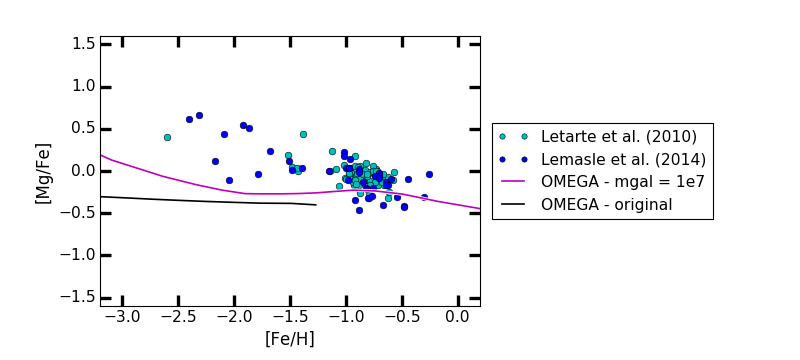

(-3.2, 0.2)

In [8]:
# Select the abundance ratios.
%matplotlib nbagg
yaxis = '[Mg/Fe]'
xaxis = '[Fe/H]'

# Plot observations.
s.plot_spectro(galaxy=galaxy, xaxis=xaxis, yaxis=yaxis)

# Extract the numerical prediction using the return_x_y parameter.
xy_1e7 = o_scl_1e7.plot_spectro(xaxis=xaxis, yaxis=yaxis, return_x_y=True)

# Overplot the predictions on top of observations.
plt.plot(xy_1e7[0],   xy_1e7[1],   color='w', linewidth=3.0)
plt.plot(xy_omega[0], xy_omega[1], color='w', linewidth=3.0)
plt.plot(xy_1e7[0],   xy_1e7[1],   color='m', linewidth=1.5, label='OMEGA - mgal = 1e7')
plt.plot(xy_omega[0], xy_omega[1], color='k', linewidth=1.5, label='OMEGA - original')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), markerscale=0.8, fontsize=14)
plt.ylim(-1.6, 1.6)
plt.xlim(-3.2, 0.2)

### 2.2. Galactic inflows for sustaining the SFH

Using an open-box model introduces galactic inflows, which help sustaining the SFH when the initial mass of gas needs to be very low. Let's use the *SF_law* parameter seen in the First_steps_OMEGA_open_box notebook. In this model, the star formation efficiency *sfe* parameter sets the initial mass of the gas reservoir. Increasing *sfe* implies that less gas is needed to form the same amount of stars.

In [9]:
# Run an OMEGA open-box simulation with different star formation efficiency, "sfe".
o_scl_sfe_0_03 = omega.omega(galaxy=galaxy, SF_law=True, sfe=0.03)
o_scl_sfe_0_30 = omega.omega(galaxy=galaxy, SF_law=True, sfe=0.30)

OMEGA run in progress..


/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


   OMEGA run completed - Run time: 2.85s
OMEGA run in progress..
..Time refinement..


/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christian

   OMEGA run completed - Run time: 4.59s


As shown in the plot below, the predictions are now consistent with observations at low [Fe/H] (pink solid line).  However, the maximum predicted [Fe/H] is too large compared to observations.  Our model predicts the formation of stars with [Fe/H] larger than -0.25, while such metal-rich stars are not present in the current Fornax dataset.  This can be solved by increasing the intensity of the gas circulation, which is shown in the next section.

<IPython.core.display.Javascript object>


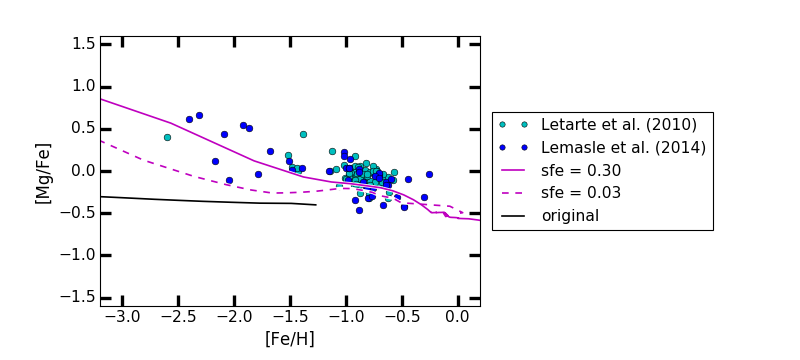

(-3.2, 0.2)

In [10]:
# Select the abundance ratios.
%matplotlib nbagg
yaxis = '[Mg/Fe]'
xaxis = '[Fe/H]'

# Plot observations.
s.plot_spectro(galaxy=galaxy, xaxis=xaxis, yaxis=yaxis)

# Extract the numerical prediction using the return_x_y parameter.
xy_0_03 = o_scl_sfe_0_03.plot_spectro(xaxis=xaxis, yaxis=yaxis, return_x_y=True)
xy_0_30 = o_scl_sfe_0_30.plot_spectro(xaxis=xaxis, yaxis=yaxis, return_x_y=True)

# Overplot the predictions on top of observations.
plt.plot(xy_0_30[0],  xy_0_30[1],  color='w', linewidth=3.0)
plt.plot(xy_0_03[0],  xy_0_03[1],  color='w', linewidth=3.0)
plt.plot(xy_omega[0], xy_omega[1], color='w', linewidth=3.0)
plt.plot(xy_0_30[0],  xy_0_30[1],  color='m', linewidth=1.5, label='sfe = 0.30')
plt.plot(xy_0_03[0],  xy_0_03[1],  color='m', linewidth=1.5, label='sfe = 0.03', linestyle='--')
plt.plot(xy_omega[0], xy_omega[1], color='k', linewidth=1.5, label='original')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), markerscale=0.8, fontsize=14)
plt.ylim(-1.6, 1.6)
plt.xlim(-3.2, 0.2)

### 2.3. Galactic outflows for intensifying the gas circulation

The *mass_loading* parameter, available when *SFR_law=True*, regulates the strength of galactic outflows. In this model, modifying the outflow rate will automatically modifies the inflow rate. This is to preserve the relation between the SFH and the available mass of gas. By increasing the *mass_loading* parameter, more metal (Fe) will be ejected and more primordial gas (H) will be introduced, thus decreasing the final [Fe/H] value.  Let's run two simulations with different gas circulation intensity.

In [11]:
# Run an OMEGA open-box simulation with a different outflow rate, with the "mass_loading" parameter.
o_scl_ml_2_0 = omega.omega(galaxy=galaxy, SF_law=True, sfe=0.30, mass_loading=2.0)
o_scl_ml_4_0 = omega.omega(galaxy=galaxy, SF_law=True, sfe=0.30, mass_loading=4.0)

OMEGA run in progress..
..Time refinement..


/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


   OMEGA run completed - Run time: 5.37s
OMEGA run in progress..
..Time refinement..
   OMEGA run completed - Run time: 4.26s


In the plot below, the final predicted [Fe/H] value with the red dashed line is better than with the pink solid line.  However, the bend seems to occur too soon with the red dashed line (at [Fe/H] = -0.85).

<IPython.core.display.Javascript object>


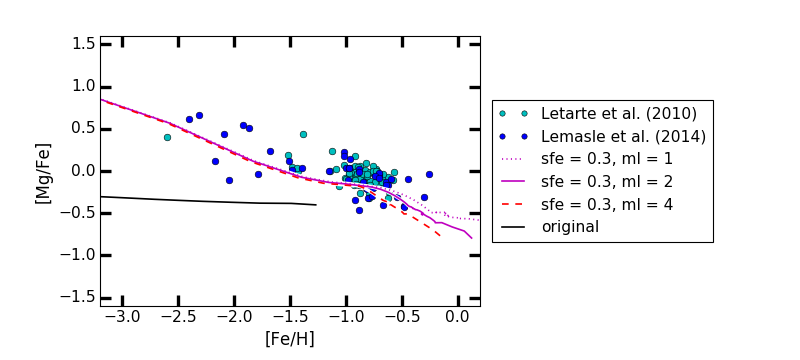

(-3.2, 0.2)

In [12]:
# Select the abundance ratios.
%matplotlib nbagg
yaxis = '[Mg/Fe]'
xaxis = '[Fe/H]'

# Plot observations.
s.plot_spectro(galaxy=galaxy, xaxis=xaxis, yaxis=yaxis)

# Extract the numerical prediction using the return_x_y parameter.
xy_ml_2_0 = o_scl_ml_2_0.plot_spectro(xaxis=xaxis, yaxis=yaxis, return_x_y=True)
xy_ml_4_0 = o_scl_ml_4_0.plot_spectro(xaxis=xaxis, yaxis=yaxis, return_x_y=True)

# Overplot the predictions on top of observations.
plt.plot(xy_0_30[0],   xy_0_30[1],   color='w', linewidth=3.0)
plt.plot(xy_ml_2_0[0], xy_ml_2_0[1], color='w', linewidth=3.0)
plt.plot(xy_ml_4_0[0], xy_ml_4_0[1], color='w', linewidth=3.0)
plt.plot(xy_omega[0],  xy_omega[1],  color='w', linewidth=3.0)
plt.plot(xy_0_30[0],   xy_0_30[1],   color='m', linewidth=1.5, label='sfe = 0.3, ml = 1', linestyle=':')
plt.plot(xy_ml_2_0[0], xy_ml_2_0[1], color='m', linewidth=1.5, label='sfe = 0.3, ml = 2')
plt.plot(xy_ml_4_0[0], xy_ml_4_0[1], color='r', linewidth=1.5, label='sfe = 0.3, ml = 4', linestyle='--')
plt.plot(xy_omega[0],  xy_omega[1],  color='k', linewidth=1.5, label='original')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), markerscale=0.8, fontsize=14)
plt.ylim(-1.6, 1.6)
plt.xlim(-3.2, 0.2)

One solution is to keep the configuration of the pink solid line and to reduce the number of SNe Ia.  Less SNe Ia will reduce the amount of Fe in the system, thus decreasing the final [Fe/H] and increasing the final [Mg/Fe].

In [13]:
# Run an OMEGA open-box simulation with less SNe Ia (nb_1a_per_m = 1.0e-3 originally).
o_scl_1a_0_4 = omega.omega(galaxy=galaxy, SF_law=True, sfe=0.30, mass_loading=2.0, nb_1a_per_m=0.4e-3)

OMEGA run in progress..
..Time refinement..


/Users/christian/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


   OMEGA run completed - Run time: 4.76s


As shown in the plot below, the new final [Fe/H] value (solid pink line) is more consistent with observations compared to the original case (dashed pink line).

<IPython.core.display.Javascript object>


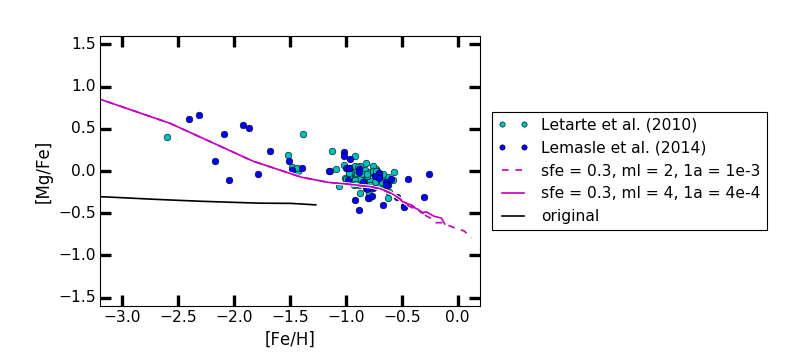

(-3.2, 0.2)

In [14]:
# Select the abundance ratios.
%matplotlib nbagg
yaxis = '[Mg/Fe]'
xaxis = '[Fe/H]'

# Plot observations.
s.plot_spectro(galaxy=galaxy, xaxis=xaxis, yaxis=yaxis)

# Extract the numerical prediction using the return_x_y parameter.
xy_1a_0_4 = o_scl_1a_0_4.plot_spectro(xaxis=xaxis, yaxis=yaxis, return_x_y=True)

# Overplot the predictions on top of observations.
plt.plot(xy_ml_2_0[0], xy_ml_2_0[1], color='w', linewidth=3.0)
plt.plot(xy_1a_0_4[0], xy_1a_0_4[1], color='w', linewidth=3.0)
plt.plot(xy_omega[0],  xy_omega[1],  color='w', linewidth=3.0)
plt.plot(xy_ml_2_0[0], xy_ml_2_0[1], color='m', linewidth=1.5, label='sfe = 0.3, ml = 2, 1a = 1e-3', linestyle='--')
plt.plot(xy_1a_0_4[0], xy_1a_0_4[1], color='m', linewidth=1.5, label='sfe = 0.3, ml = 4, 1a = 4e-4')
plt.plot(xy_omega[0],  xy_omega[1],  color='k', linewidth=1.5, label='original')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), markerscale=0.8, fontsize=14)
plt.ylim(-1.6, 1.6)
plt.xlim(-3.2, 0.2)

By looking into SYGMA with our choice of yields, one would see that the [Mg/Fe] ratio is typically higher in the ejecta of massive stars below 15 Msun then in the ejecta of more massive stars.  To slightly improve our predictions, we can increase the transition mass (*transitionmass*) between AGB and massive stars from 8 Msun (default value) to 10 Msun.  This will reduce the number of massive stars that have a high-[Mg/Fe] ejecta, as seen in the plot below (solid pink line).

In [15]:
# Run an OMEGA open-box simulation with a larger transition mass.
o_scl_tm_10 = omega.omega(galaxy=galaxy, \
     SF_law=True, sfe=0.3, mass_loading=2.0, nb_1a_per_m=0.4e-3, transitionmass=10)

OMEGA run in progress..
..Time refinement..
   OMEGA run completed - Run time: 5.91s


<IPython.core.display.Javascript object>


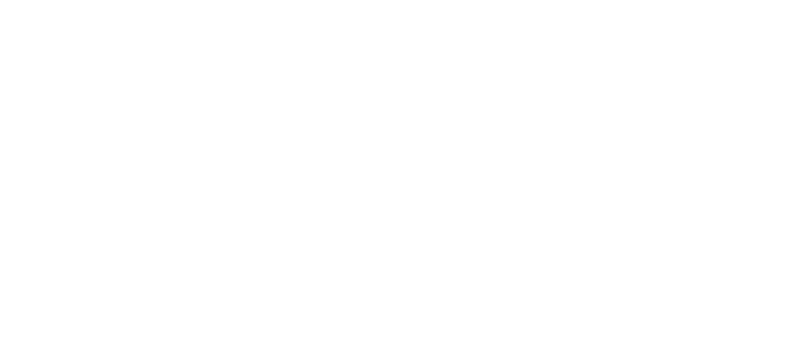

(-3.2, 0.2)

In [16]:
# Select the abundance ratios.
%matplotlib nbagg
yaxis = '[Mg/Fe]'
xaxis = '[Fe/H]'

# Plot observations.
s.plot_spectro(galaxy=galaxy, xaxis=xaxis, yaxis=yaxis)

# Extract the numerical prediction using the return_x_y parameter.
xy_tm_10 = o_scl_tm_10.plot_spectro(xaxis=xaxis, yaxis=yaxis, return_x_y=True)

# Overplot the predictions on top of observations.
plt.plot(xy_tm_10[0],  xy_tm_10[1],  color='w', linewidth=3.0)
plt.plot(xy_1a_0_4[0], xy_1a_0_4[1], color='w', linewidth=3.0)
plt.plot(xy_omega[0],  xy_omega[1],  color='w', linewidth=3.0)
plt.plot(xy_tm_10[0],  xy_tm_10[1],  color='m', linewidth=1.5, label='previous, mt = 10')
plt.plot(xy_1a_0_4[0], xy_1a_0_4[1], color='m', linewidth=1.5, label='previous, mt = 8', linestyle=':')
plt.plot(xy_omega[0],  xy_omega[1],  color='k', linewidth=1.5, label='original')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), markerscale=0.8, fontsize=14)
plt.ylim(-1.6, 1.6)
plt.xlim(-3.2, 0.2)

### 2.4. The importance of investigating many elements simultaneously

In the previous section, we tuned the input parameters of our model to reproduce the [Mg/Fe] vs [Fe/H] relation in Fornax. Now, let's look at [Si/Fe] using the same set of parameters.

<IPython.core.display.Javascript object>


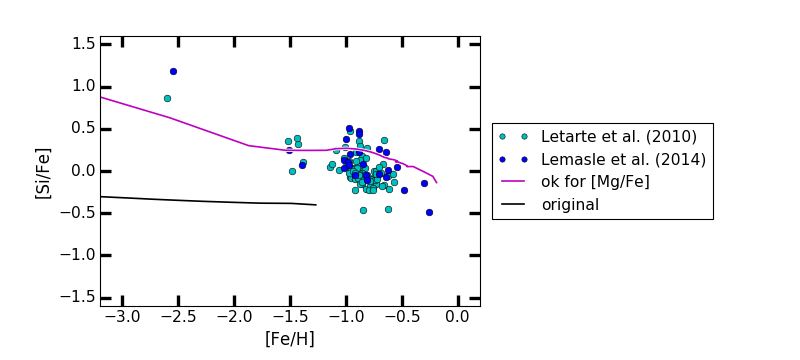

(-3.2, 0.2)

In [17]:
# Select the abundance ratios.
%matplotlib nbagg
yaxis = '[Si/Fe]'
xaxis = '[Fe/H]'

# Plot observations.
s.plot_spectro(galaxy=galaxy, xaxis=xaxis, yaxis=yaxis)

# Extract the numerical prediction using the return_x_y parameter.
xy_tm_10 = o_scl_tm_10.plot_spectro(xaxis=xaxis, yaxis=yaxis, return_x_y=True)

# Overplot the predictions on top of observations.
plt.plot(xy_tm_10[0],  xy_tm_10[1],  color='w', linewidth=3.0)
plt.plot(xy_omega[0],  xy_omega[1],  color='w', linewidth=3.0)
plt.plot(xy_tm_10[0], xy_tm_10[1], color='m', linewidth=1.5, label='ok for [Mg/Fe]')
plt.plot(xy_omega[0],  xy_omega[1],  color='k', linewidth=1.5, label='original')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), markerscale=0.8, fontsize=14)
plt.ylim(-1.6, 1.6)
plt.xlim(-3.2, 0.2)

As seen above, the value of our input parameters do not allow to reproduce the Si abundances data.  This can be solved by increasing the outflow rate (gas circulation) and the number of SNe Ia.

In [18]:
# Run an OMEGA open-box simulation to fit [Si/Fe].
o_scl_Si_ok = omega.omega(galaxy=galaxy, \
     SF_law=True, sfe=0.30, mass_loading=6.0, nb_1a_per_m=1.5e-3, transitionmass=10)

OMEGA run in progress..
..Time refinement..
   OMEGA run completed - Run time: 5.43s


The plot below shows that our new set of parameters allows to reproduce the Si abundances of Fornax (red dashed line).

<IPython.core.display.Javascript object>


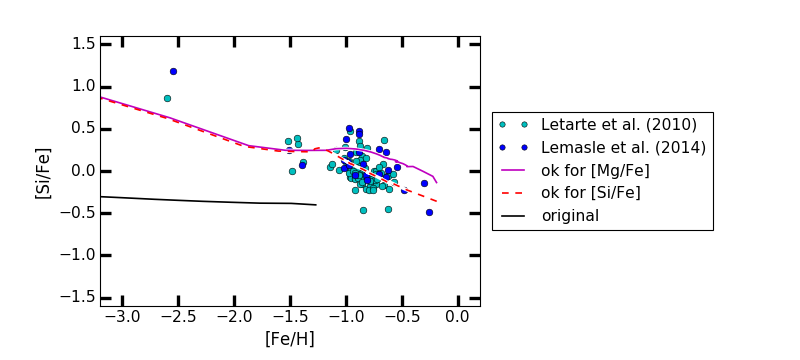

(-3.2, 0.2)

In [19]:
# Select the abundance ratios.
%matplotlib nbagg
yaxis = '[Si/Fe]'
xaxis = '[Fe/H]'

# Plot observations.
s.plot_spectro(galaxy=galaxy, xaxis=xaxis, yaxis=yaxis)

# Extract the numerical prediction using the return_x_y parameter.
xy_tm_10 = o_scl_tm_10.plot_spectro(xaxis=xaxis, yaxis=yaxis, return_x_y=True)
xy_Si_ok = o_scl_Si_ok.plot_spectro(xaxis=xaxis, yaxis=yaxis, return_x_y=True)

# Overplot the predictions on top of observations.
plt.plot(xy_tm_10[0],  xy_tm_10[1],  color='w', linewidth=3.0)
plt.plot(xy_Si_ok[0],  xy_Si_ok[1],  color='w', linewidth=3.0)
plt.plot(xy_omega[0],  xy_omega[1],  color='w', linewidth=3.0)
plt.plot(xy_tm_10[0], xy_tm_10[1], color='m', linewidth=1.5, label='ok for [Mg/Fe]')
plt.plot(xy_Si_ok[0], xy_Si_ok[1], color='r', linewidth=1.5, label='ok for [Si/Fe]', linestyle='--')
plt.plot(xy_omega[0],  xy_omega[1],  color='k', linewidth=1.5, label='original')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), markerscale=0.8, fontsize=14)
plt.ylim(-1.6, 1.6)
plt.xlim(-3.2, 0.2)

However, if we look back at [Mg/Fe], we notice that the parameters which worked for Si do not work for Mg.

<IPython.core.display.Javascript object>


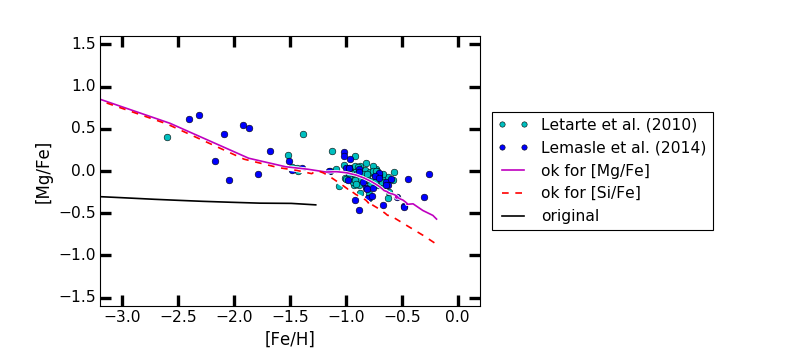

(-3.2, 0.2)

In [20]:
# Select the abundance ratio
%matplotlib nbagg
xaxis = '[Fe/H]'
yaxis = '[Mg/Fe]'

# Plot observations
s.plot_spectro(galaxy=galaxy, xaxis=xaxis, yaxis=yaxis)

# Extract the numerical prediction using the return_x_y parameter.
xy_tm_10 = o_scl_tm_10.plot_spectro(xaxis=xaxis, yaxis=yaxis, return_x_y=True)
xy_Si_ok = o_scl_Si_ok.plot_spectro(xaxis=xaxis, yaxis=yaxis, return_x_y=True)

# Overplot the predictions on top of observations.
plt.plot(xy_tm_10[0],  xy_tm_10[1],  color='w', linewidth=3.0)
plt.plot(xy_Si_ok[0],  xy_Si_ok[1],  color='w', linewidth=3.0)
plt.plot(xy_omega[0],  xy_omega[1],  color='w', linewidth=3.0)
plt.plot(xy_tm_10[0], xy_tm_10[1], color='m', linewidth=1.5, label='ok for [Mg/Fe]')
plt.plot(xy_Si_ok[0], xy_Si_ok[1], color='r', linewidth=1.5, label='ok for [Si/Fe]', linestyle='--')
plt.plot(xy_omega[0],  xy_omega[1],  color='k', linewidth=1.5, label='original')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), markerscale=0.8, fontsize=14)
plt.ylim(-1.6, 1.6)
plt.xlim(-3.2, 0.2)

When investigating the chemical evolution of a galaxy, **it is very important to include as many elements as possible**. Otherwise, the conclusions drawn from numerical predictions can be misleading.  **The best a chemical evolution model can do is limited by its input stellar yields**.  Our experiment shows that there is either too much Si or not enough Mg in our stellar yields (or maybe both..). **A good exercise is to consider more elements and to repeat the experiment with other galaxies** to see if the isolated problems remain.